#### Named Entity Recognition

In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [146]:
meesho=pd.read_csv("E:/Gaurav Finance/Revisit/meesho.txt",error_bad_lines=False)
meesho

,"Meesho is a fraud online shopping site , when you register you won't get any confirmation on mail moreover for your any order there is no confirmation mail. \r\nThese things clearly shows how unprofessional and fake meesho is. \r\nDon't buy from I lost my 1200 not receive any product . \r\nThis is a pathetic scam website . \r\nThere's no solution on complaints many times complaint # 1630-5015.\r\nDon't install this app I'll recommend to all. \r\nHi I am Writing this review as a seller, I will recommend you in a one line that don't open your account in meesho.\r\nIt is just waste of time. \r\nvery poor seller support, your catalogue can be deleted any time from meesho.\r\nNo response from courier service. If you want to spoil your time and money than you can join..Worst first time experience. \r\nBought a kurti, paid for it in google pay, but no order was placed in the app. \r\nCalled customer care, one lady said money will be returned within a week, but no results. \r\nClothes that are sold here are 1st copies/ duplicates from Myntra, Ajio, amazon and other clothing brands. \r\nIts better to buy from the original sites when they are on sale. The sizes are not mentioned in every product. \r\nClothes sold here are very repetitive typically sold by budding online sellers nowadays.\r\npathetic app.\r\nBad experience to order here as it delayes the delivery.\r\nworthless app"


In [147]:
meesho

,"Meesho is a fraud online shopping site , when you register you won't get any confirmation on mail moreover for your any order there is no confirmation mail. \r\nThese things clearly shows how unprofessional and fake meesho is. \r\nDon't buy from I lost my 1200 not receive any product . \r\nThis is a pathetic scam website . \r\nThere's no solution on complaints many times complaint # 1630-5015.\r\nDon't install this app I'll recommend to all. \r\nHi I am Writing this review as a seller, I will recommend you in a one line that don't open your account in meesho.\r\nIt is just waste of time. \r\nvery poor seller support, your catalogue can be deleted any time from meesho.\r\nNo response from courier service. If you want to spoil your time and money than you can join..Worst first time experience. \r\nBought a kurti, paid for it in google pay, but no order was placed in the app. \r\nCalled customer care, one lady said money will be returned within a week, but no results. \r\nClothes that are sold here are 1st copies/ duplicates from Myntra, Ajio, amazon and other clothing brands. \r\nIts better to buy from the original sites when they are on sale. The sizes are not mentioned in every product. \r\nClothes sold here are very repetitive typically sold by budding online sellers nowadays.\r\npathetic app.\r\nBad experience to order here as it delayes the delivery.\r\nworthless app"


In [148]:
#joining all reviews as one paragraph or single text
text = ' '.join(meesho)
text

"Meesho is a fraud online shopping site , when you register you won't get any confirmation on mail moreover for your any order there is no confirmation mail. \r\nThese things clearly shows how unprofessional and fake meesho is. \r\nDon't buy from I lost my 1200 not receive any product . \r\nThis is a pathetic scam website . \r\nThere's no solution on complaints many times complaint # 1630-5015.\r\nDon't install this app I'll recommend to all. \r\nHi I am Writing this review as a seller, I will recommend you in a one line that don't open your account in meesho.\r\nIt is just waste of time. \r\nvery poor seller support, your catalogue can be deleted any time from meesho.\r\nNo response from courier service. If you want to spoil your time and money than you can join..Worst first time experience. \r\nBought a kurti, paid for it in google pay, but no order was placed in the app. \r\nCalled customer care, one lady said money will be returned within a week, but no results. \r\nClothes that ar

In [149]:
#punctuations
no_punc = text.translate(str.maketrans('','',string.punctuation))
no_punc

'Meesho is a fraud online shopping site  when you register you wont get any confirmation on mail moreover for your any order there is no confirmation mail \r\nThese things clearly shows how unprofessional and fake meesho is \r\nDont buy from I lost my 1200 not receive any product  \r\nThis is a pathetic scam website  \r\nTheres no solution on complaints many times complaint  16305015\r\nDont install this app Ill recommend to all \r\nHi I am Writing this review as a seller I will recommend you in a one line that dont open your account in meesho\r\nIt is just waste of time \r\nvery poor seller support your catalogue can be deleted any time from meesho\r\nNo response from courier service If you want to spoil your time and money than you can joinWorst first time experience \r\nBought a kurti paid for it in google pay but no order was placed in the app \r\nCalled customer care one lady said money will be returned within a week but no results \r\nClothes that are sold here are 1st copies dup

In [150]:
#tokenisation
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc)
print(text_tokens)

['Meesho', 'is', 'a', 'fraud', 'online', 'shopping', 'site', 'when', 'you', 'register', 'you', 'wont', 'get', 'any', 'confirmation', 'on', 'mail', 'moreover', 'for', 'your', 'any', 'order', 'there', 'is', 'no', 'confirmation', 'mail', 'These', 'things', 'clearly', 'shows', 'how', 'unprofessional', 'and', 'fake', 'meesho', 'is', 'Dont', 'buy', 'from', 'I', 'lost', 'my', '1200', 'not', 'receive', 'any', 'product', 'This', 'is', 'a', 'pathetic', 'scam', 'website', 'Theres', 'no', 'solution', 'on', 'complaints', 'many', 'times', 'complaint', '16305015', 'Dont', 'install', 'this', 'app', 'Ill', 'recommend', 'to', 'all', 'Hi', 'I', 'am', 'Writing', 'this', 'review', 'as', 'a', 'seller', 'I', 'will', 'recommend', 'you', 'in', 'a', 'one', 'line', 'that', 'dont', 'open', 'your', 'account', 'in', 'meesho', 'It', 'is', 'just', 'waste', 'of', 'time', 'very', 'poor', 'seller', 'support', 'your', 'catalogue', 'can', 'be', 'deleted', 'any', 'time', 'from', 'meesho', 'No', 'response', 'from', 'courier

In [151]:
#removal of stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stopwords = stopwords.words('english')
my_stopwords.append('the')
no_stop = [word for word in text_tokens if not word in my_stopwords]
print(no_stop)

['Meesho', 'fraud', 'online', 'shopping', 'site', 'register', 'wont', 'get', 'confirmation', 'mail', 'moreover', 'order', 'confirmation', 'mail', 'These', 'things', 'clearly', 'shows', 'unprofessional', 'fake', 'meesho', 'Dont', 'buy', 'I', 'lost', '1200', 'receive', 'product', 'This', 'pathetic', 'scam', 'website', 'Theres', 'solution', 'complaints', 'many', 'times', 'complaint', '16305015', 'Dont', 'install', 'app', 'Ill', 'recommend', 'Hi', 'I', 'Writing', 'review', 'seller', 'I', 'recommend', 'one', 'line', 'dont', 'open', 'account', 'meesho', 'It', 'waste', 'time', 'poor', 'seller', 'support', 'catalogue', 'deleted', 'time', 'meesho', 'No', 'response', 'courier', 'service', 'If', 'want', 'spoil', 'time', 'money', 'joinWorst', 'first', 'time', 'experience', 'Bought', 'kurti', 'paid', 'google', 'pay', 'order', 'placed', 'app', 'Called', 'customer', 'care', 'one', 'lady', 'said', 'money', 'returned', 'within', 'week', 'results', 'Clothes', 'sold', '1st', 'copies', 'duplicates', 'Mynt

[nltk_data] Downloading package punkt to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [153]:
one_block = text[0:]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [154]:
#tokenisation for the entire blog
for token in doc_block[0:]:
    print(token, token.pos_) 

Meesho PROPN
is AUX
a DET
fraud NOUN
online ADJ
shopping NOUN
site NOUN
, PUNCT
when ADV
you PRON
register VERB
you PRON
wo AUX
n't PART
get VERB
any DET
confirmation NOUN
on ADP
mail NOUN
moreover ADV
for ADP
your PRON
any DET
order NOUN
there PRON
is VERB
no DET
confirmation NOUN
mail NOUN
. PUNCT

 SPACE
These DET
things NOUN
clearly ADV
shows VERB
how ADV
unprofessional ADJ
and CCONJ
fake ADJ
meesho NOUN
is AUX
. PUNCT

 SPACE
Do AUX
n't PART
buy VERB
from ADP
I PRON
lost VERB
my PRON
1200 NUM
not PART
receive VERB
any DET
product NOUN
. PUNCT

 SPACE
This DET
is AUX
a DET
pathetic ADJ
scam NOUN
website NOUN
. PUNCT

 SPACE
There PRON
's AUX
no DET
solution NOUN
on ADP
complaints NOUN
many ADJ
times NOUN
complaint VERB
# SYM
1630 NUM
- SYM
5015 NUM
. PUNCT

 SPACE
Do AUX
n't PART
install VERB
this DET
app NOUN
I PRON
'll AUX
recommend VERB
to ADP
all DET
. PUNCT

 SPACE
Hi INTJ
I PRON
am AUX
Writing VERB
this DET
review NOUN
as ADP
a DET
seller NOUN
, PUNCT
I PRON
will AUX
recommen

#### Emotion Mining

In [155]:
#Sentiment analysis
afinn = pd.read_csv('E:/Gaurav Finance/Revisit/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(7945, 2)

In [156]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(meesho))
sentences[0:] 

["Meesho is a fraud online shopping site , when you register you won't get any confirmation on mail moreover for your any order there is no confirmation mail.",
 'These things clearly shows how unprofessional and fake meesho is.',
 "Don't buy from I lost my 1200 not receive any product .",
 'This is a pathetic scam website .',
 "There's no solution on complaints many times complaint # 1630-5015.",
 "Don't install this app I'll recommend to all.",
 "Hi I am Writing this review as a seller, I will recommend you in a one line that don't open your account in meesho.",
 'It is just waste of time.',
 'very poor seller support, your catalogue can be deleted any time from meesho.',
 'No response from courier service.',
 'If you want to spoil your time and money than you can join..Worst first time experience.',
 'Bought a kurti, paid for it in google pay, but no order was placed in the app.',
 'Called customer care, one lady said money will be returned within a week, but no results.',
 'Clothes

In [157]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,"Meesho is a fraud online shopping site , when ..."
1,These things clearly shows how unprofessional ...
2,Don't buy from I lost my 1200 not receive any ...
3,This is a pathetic scam website .
4,There's no solution on complaints many times c...
5,Don't install this app I'll recommend to all.
6,"Hi I am Writing this review as a seller, I wil..."
7,It is just waste of time.
8,"very poor seller support, your catalogue can b..."
9,No response from courier service.


In [158]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [159]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [160]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [161]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     28
1     10
2     12
3      7
4     10
5      8
6     24
7      6
8     13
9      5
10    16
11    17
12    16
13    17
14    13
15     8
16    13
17     2
18    10
19     2
Name: word_count, dtype: int64

In [162]:
sent_df 

,sentence,sentiment_value,word_count
0,"Meesho is a fraud online shopping site , when ...",-5,28
1,These things clearly shows how unprofessional ...,-4,10
2,Don't buy from I lost my 1200 not receive any ...,-3,12
3,This is a pathetic scam website .,-4,7
4,There's no solution on complaints many times c...,-6,10
5,Don't install this app I'll recommend to all.,2,8
6,"Hi I am Writing this review as a seller, I wil...",2,24
7,It is just waste of time.,-1,6
8,"very poor seller support, your catalogue can b...",0,13
9,No response from courier service.,-1,5


In [163]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    20.000000
mean     -1.700000
std       2.536056
min      -6.000000
25%      -4.000000
50%      -2.000000
75%       0.000000
max       3.000000
Name: sentiment_value, dtype: float64

In [164]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\my pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

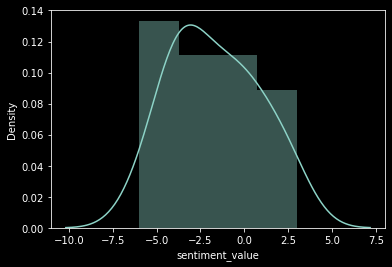

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

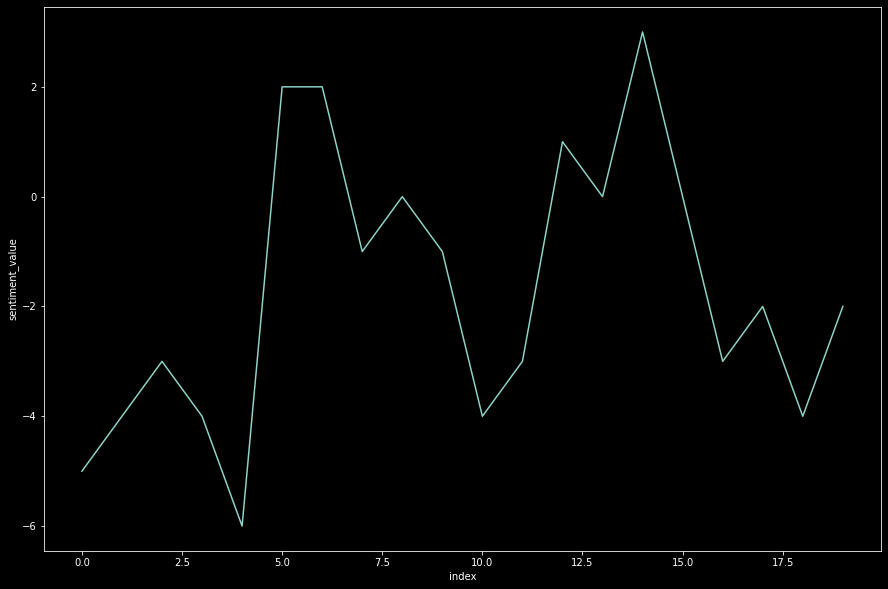

In [170]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

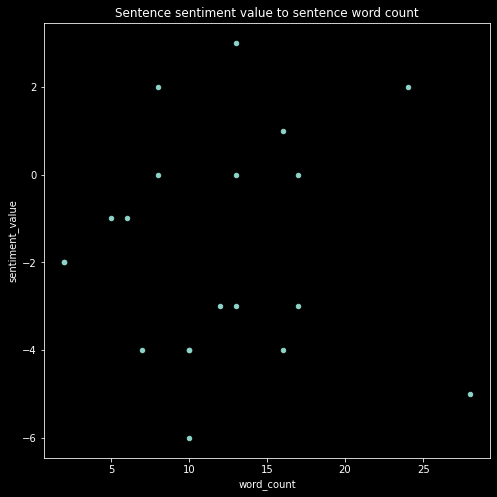

In [171]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

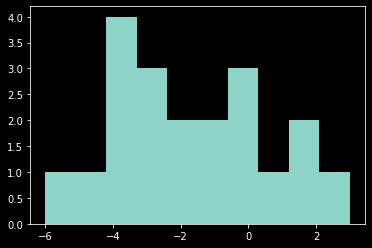

<Figure size 720x360 with 0 Axes>

In [174]:
#another style for visualisation
plt.style.use(['dark_background'])
plt.hist(sent_df['sentiment_value'])
plt.figure(figsize=(10,5))
xlabel = 'sentiment_value'